# Data wrangling
Data wrangling is the process of cleaning, transforming and organizing data so that it can be used for analysis and visualization. It is an important step in the data analysis process because raw data is often incomplete, inconsistent and in an unstructured format, which can make it difficult to work with.Data wrangling helps to make the data more consistent, accurate, and useful for analysis and decision making.
Data wrangling helps to make the data more consistent, accurate and useful for analysis and decision making
* data wrangling is also called data cleaning

# Steps involved:
1. Gathering data
2. Assessing the data (EDA) 
3. cleaning the data.
    a. finding missing values.
    b. dealing with missing values.
    c. correcting errors in the data.
        i. outliers removal.
            ia. visualization
            ib. IQR method (inter quartile range)
            ic. Z-score.
    d. droping duplicates.
4. Transforming the data:
    4.1 Min-Max normalization/scaling
    4.2 Standard scaler
    4.3 Log transformation
    4.4 Winsorization
    4.5 Z-score normalization
    4.6 Decimal Scaling.
5. Feature Engineering
6. Organizing the data:
    6.1. columns creation
    6.2 Renaming
7. Saving the data to be used.


In [1]:
# For gathering data we need libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# we can use panda or seaborn to load the dataset.
# df=pd.read_csv("titanic_train.csv")
# or,
df=sns.load_dataset("titanic")

# now we assessing the data.
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
df.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [5]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [8]:
df.shape


(891, 15)

In [9]:
# 2. clean the data here we have to look missing values.
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [10]:
# from above here age has 177 , embarked has 2, deck has 688 and emabrked_town has 2 
# missing values 
df.isnull().sum()/ len(df)* 100

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

In [12]:
df.drop(columns='deck',inplace=True)
# here we removed the deck columns

In [13]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [19]:
# fill missing values.
df['age']=df.age.fillna(value=df['age'].mean())
df['embarked']=df.embarked.fillna(value=df['embarked'].mode()[0])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  embark_town  889 non-null    object  
 12  alive        891 non-null    object  
 13  alone        891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(5)
memory usage: 79.4+ KB


In [21]:
df['embark_town']=df.embark_town.fillna(value=df['embark_town'].mode()[0])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  embark_town  891 non-null    object  
 12  alive        891 non-null    object  
 13  alone        891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(5)
memory usage: 79.4+ KB


In [22]:
# now we finished filling missing values.

#  outliers removal
* visualization method.

In [23]:
import seaborn as sns

<AxesSubplot:>

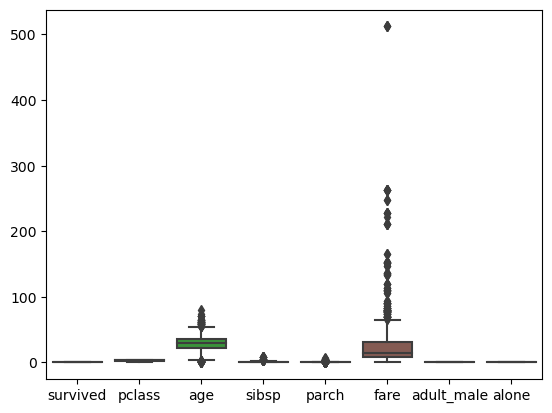

In [24]:
sns.boxplot(data=df)

<AxesSubplot:xlabel='age'>

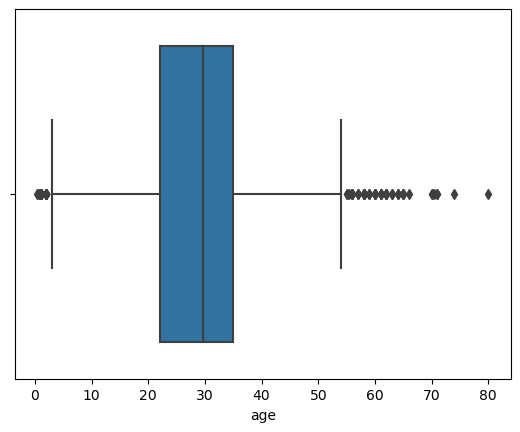

In [25]:
sns.boxplot(data=df,x='age')

<AxesSubplot:xlabel='sex', ylabel='age'>

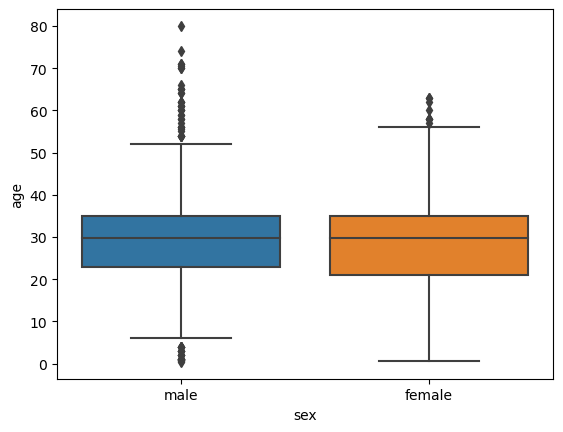

In [30]:
sns.boxplot(data=df,y='age', x='sex')

In [31]:
# here data above and below IQR is termed as outliers.


In [33]:
# IQR method for age
Q1=df['age'].quantile(0.25)
Q3=df['age'].quantile(0.75)
IQR=Q3-Q1
IQR
lower_bound=Q1 - 1.5 * IQR
upper_bound=Q3 + 1.5 * IQR
df=df[(df['age']>lower_bound) & (df['age']<upper_bound)]

In [34]:
df.shape

(825, 14)

In [35]:
# IQR method for fare
Q1=df['fare'].quantile(0.25)
Q3=df['fare'].quantile(0.75)
IQR=Q3-Q1
IQR
lower_bound=Q1 - 1.5 * IQR
upper_bound=Q3 + 1.5 * IQR
df=df[(df['fare']>lower_bound) & (df['fare']<upper_bound)]

In [36]:
df.shape

(718, 14)

<AxesSubplot:xlabel='age', ylabel='Count'>

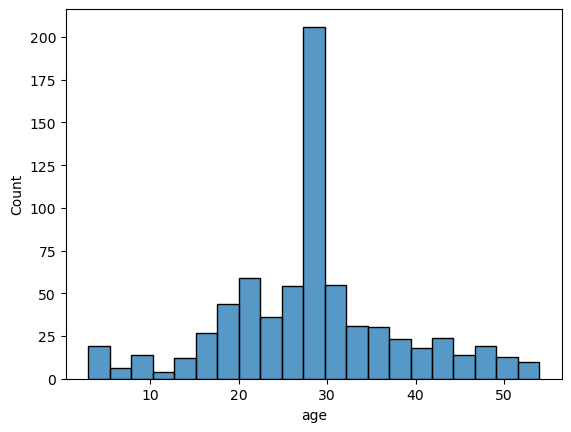

In [39]:
sns.histplot(df['age'])

<AxesSubplot:xlabel='fare', ylabel='Count'>

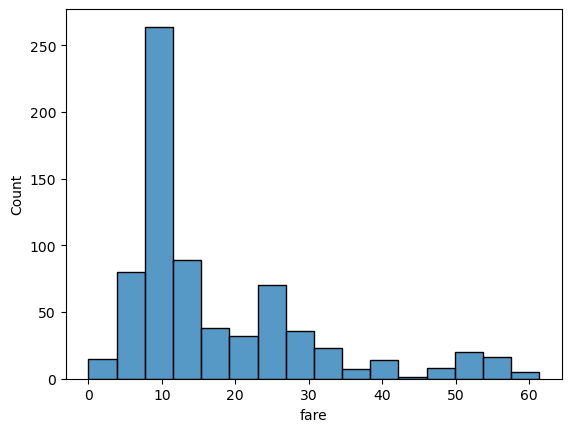

In [40]:
sns.histplot(df['fare'])

In [41]:
# till now we havenot normalize these values so it looks akward.

In [42]:
# z-score method for outliers removal.
# first we have to install scipy
# pip install scipy
# from scipy import stats
# import numpy as np
# zscore=np.abs(stats.zscore(df['age']))
# threshold=3
# df=df[(z<threshold).all(axis=1)]




# finding and dropping duplicates.

In [44]:
# find duplicates.
df.duplicated().sum()

103

In [45]:
df.shape

(718, 14)

In [47]:
# dropping duplicates.
df.drop_duplicates(inplace=True)
df.shape

(615, 14)

In [48]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,Southampton,no,False
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,Southampton,no,True
5,0,3,male,29.699118,0,0,8.4583,Q,Third,man,True,Queenstown,no,True


In [49]:
# upto this we have cleaned our data.

# Transform the data.
 * Data Normalizaton Techniques

In [50]:
pip install scikit-learn

In [57]:
#from sklearn.preprocessing import MinMaxScaler

#data
#df

# select columns to normalize
#cols_to_normalize=['age','fare']

# create the scalar function/tool
#scaler=MinMaxScaler()

# fit and transform the data on scaler or viceversa
#df[cols_to_normalize]=scaler.fit_transform(df[cols_to_normalize])

# check the data
#df


 


In [54]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000
mean,0.360976,2.469919,0.497584,0.460163,0.365854,0.298831
std,0.480674,0.741063,0.209485,0.894039,0.835572,0.221334
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.372549,0.000000,0.000000,0.128640
50%,0.000000,3.000000,0.523512,0.000000,0.000000,0.211798
75%,1.000000,3.000000,0.607843,1.000000,0.000000,0.423596
max,1.000000,3.000000,1.000000,5.000000,6.000000,1.000000


In [56]:
# for standard scaler
#from sklearn.preprocessing import StandardScaler

#data
#df

# select columns to normalize
#cols_to_normalize=['age','fare']

# create the scalar function/tool
#scaler=StandardScaler()

# fit and transform the data on scaler or viceversa
#df[cols_to_normalize]=scaler.fit_transform(df[cols_to_normalize])

# check the data
#df

# standard scaler eqn;
#x_stand=(x-mean(x))/std(x)
#where 
#x_stand is the standardized variable
#x is the original value
#mean(x) is the mean of the variable x
#std(x) is standard deviation of variable x

In [58]:
# Log transformation
# in log transformation we do log and then remove outliers.
# load the dataset.
# check the info
# then fill missing values in cols.
df['age']=df['age'].fillna(df['age'].median())
df['fare']=df['fare'].fillna(df['fare'].median())

# then do log transformation
df['age']=np.log(df['age'])
df['fare']=np.log(df['fare'])
df.head()

#यसले समुन्द्रमा भएको चिजलाई एउटा भाडामा राखेर हेर्न मदत गर्छ ।
# यसले रेन्ज घटाएर देखाउछ ।








C:\Users\HP\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,-0.987387,1,0,-2.136070,S,Third,man,True,Southampton,no,False
2,1,3,female,-0.796331,0,0,-2.047049,S,Third,woman,False,Southampton,yes,True
3,1,1,female,-0.466090,1,0,-0.144894,S,First,woman,False,Southampton,yes,False
4,0,3,male,-0.466090,0,0,-2.031399,S,Third,man,True,Southampton,no,True
5,0,3,male,-0.647195,0,0,-1.981923,Q,Third,man,True,Queenstown,no,True


<AxesSubplot:xlabel='sex', ylabel='fare'>

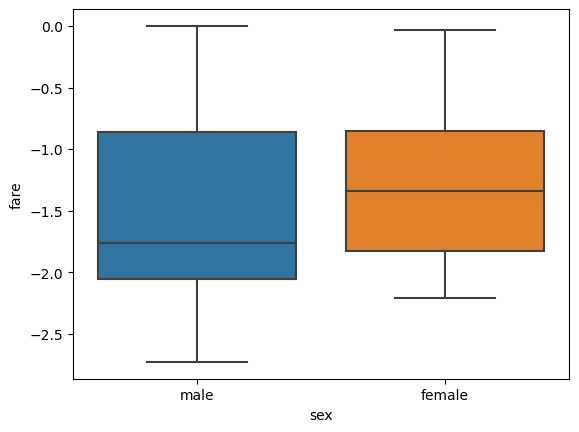

In [60]:
sns.boxplot(data=df,x='sex',y='fare')

In [61]:
# see no outliers.

<AxesSubplot:xlabel='age', ylabel='Count'>

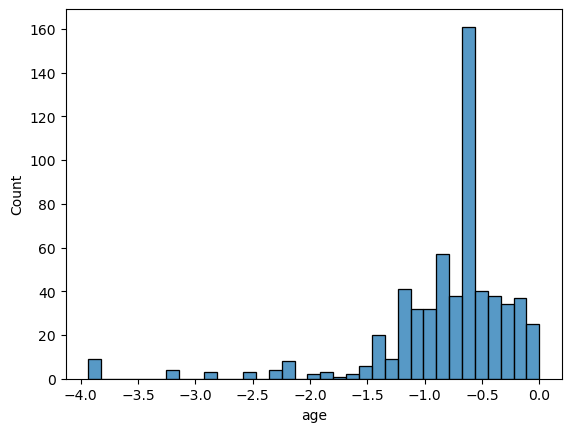

In [63]:
sns.histplot(df['age'])

<AxesSubplot:xlabel='fare', ylabel='Count'>

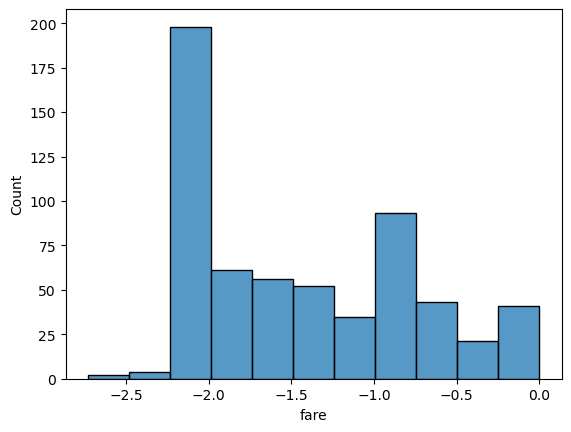

In [64]:
sns.histplot(df['fare'])

# Organizing the data.

In [67]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone', 'family_size'],
      dtype='object')

In [66]:
df['family_size']=df['sibsp']+df['parch']

<AxesSubplot:xlabel='family_size', ylabel='Count'>

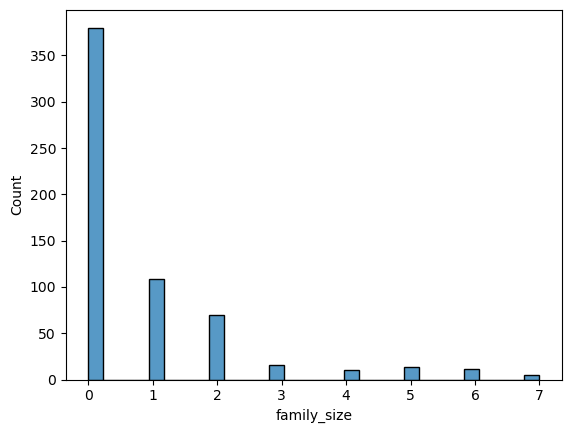

In [68]:
sns.histplot(df['family_size'])

C:\Users\HP\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 41.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 14.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='sex', ylabel='age'>

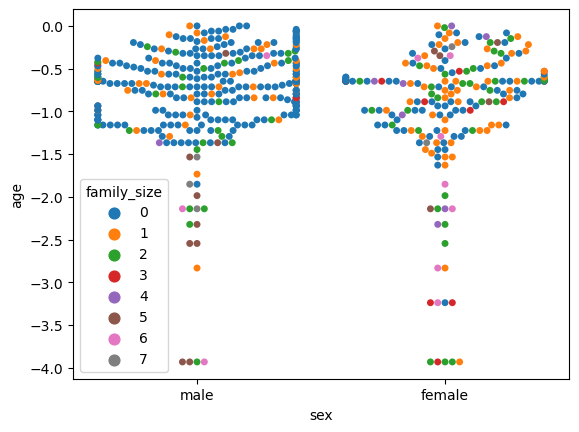

In [71]:
sns.swarmplot(data=df, x='sex',y='age', hue='family_size')

In [72]:
df=df.rename(columns={'survived':'survival'})

In [73]:
df.columns

Index(['survival', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone', 'family_size'],
      dtype='object')

In [78]:
# pivot table
table=pd.pivot_table(df,values='fare',index='pclass',
    columns="survival", aggfunc=np.sum)
table

survival,1
pclass,
1,-24.666902
2,-83.339314


<AxesSubplot:xlabel='fare', ylabel='age'>

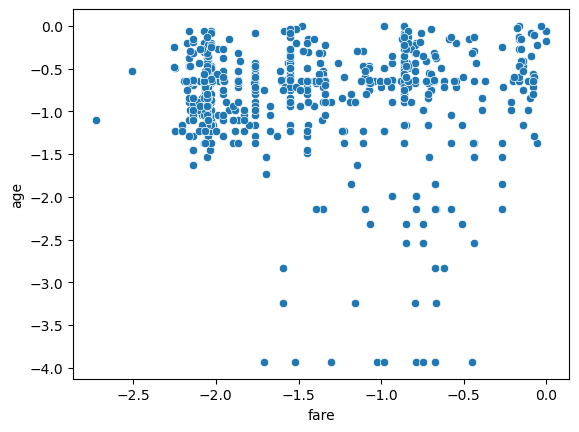

In [79]:
sns.scatterplot(data=df,x='fare',y='age')

# saving the wrangled data

In [80]:
df.to_csv("preprocessed_data.csv")